In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
telco_data = pd.read_csv('churn_Modelling.csv')

In [11]:
telco_data.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
telco_new = telco_data[['Geography','Gender','Exited']]

In [17]:
telco_new.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


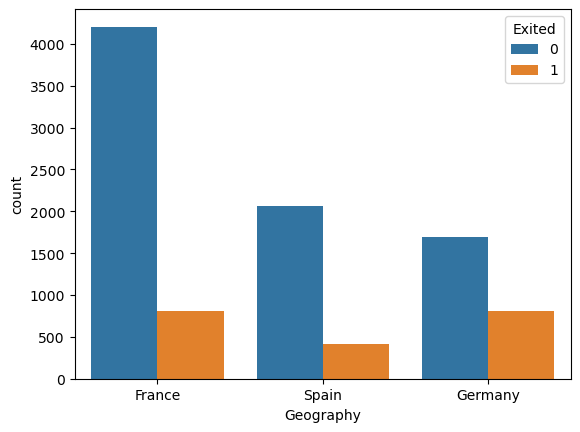

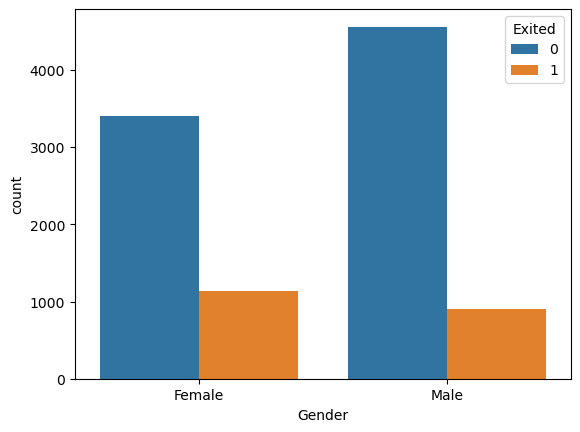

In [37]:
for i , predictor in enumerate(telco_new.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=telco_new, x = predictor, hue='Exited' )
    plt.show()

In [25]:
telco_new.head(1)

,Geography,Gender,Exited
0,France,Female,1


In [33]:
telco_new.Exited.value_counts()/len(telco_new)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

Bivariate analysis

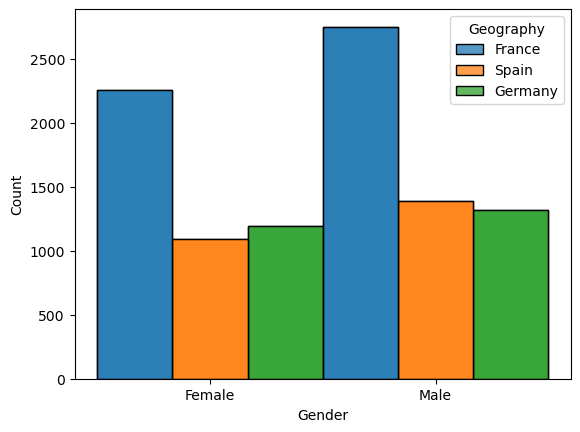

In [39]:
sns.histplot(x='Gender', hue ='Geography',data = telco_new, stat="count", multiple="dodge")
plt.show()


In [40]:
data_new = telco_new.loc[telco_new["Exited"] ==1]

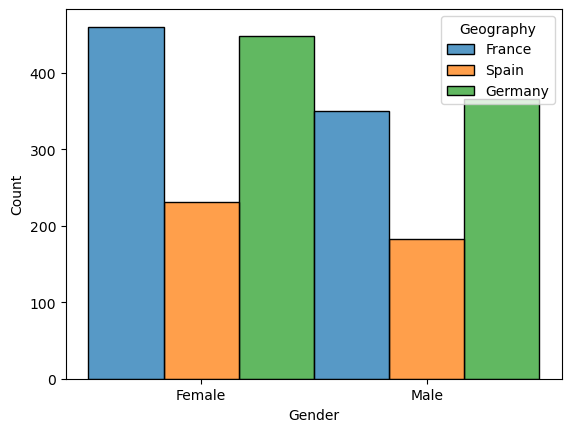

In [41]:
sns.histplot(x='Gender', hue ='Geography',data = data_new, stat="count", multiple="dodge")
plt.show()


d

In [46]:
telco_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
telco_base_data['Balance'].value_counts().sort_index(ascending=True).plot()

<Axes: xlabel='Balance'>

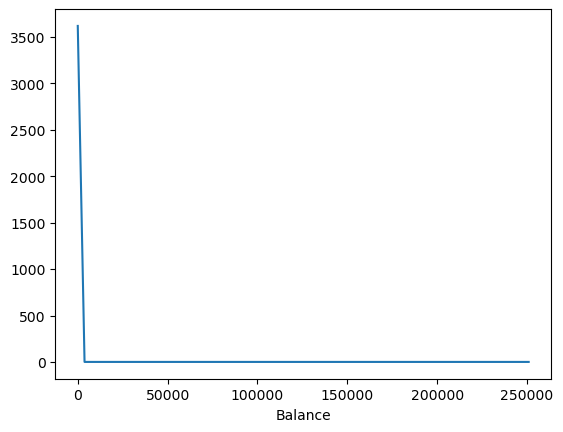

In [49]:
plt.show()

Feature Binning

In [51]:
telco_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
df = pd.read_csv('churn_Modelling.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
df.drop(columns=['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [56]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
df.Age.min()

18

In [59]:
df.Age.max()

92

In [66]:
labels = ['0-20','21-40','41-60','above-61']
bins=[0,20,40,60,100]

df['Age_bins'] = pd.cut(df.Age,bins,labels =labels,include_lowest = True)

In [67]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60


In [68]:
df[['Age','Age_bins']]

,Age,Age_bins
0,42,41-60
1,41,41-60
2,42,41-60
3,39,21-40
4,43,41-60
...,...,...
9995,39,21-40
9996,35,21-40
9997,36,21-40
9998,42,41-60


In [69]:
df.Age_bins.value_counts()

Age_bins
21-40       6330
41-60       3117
above-61     464
0-20          89
Name: count, dtype: int64

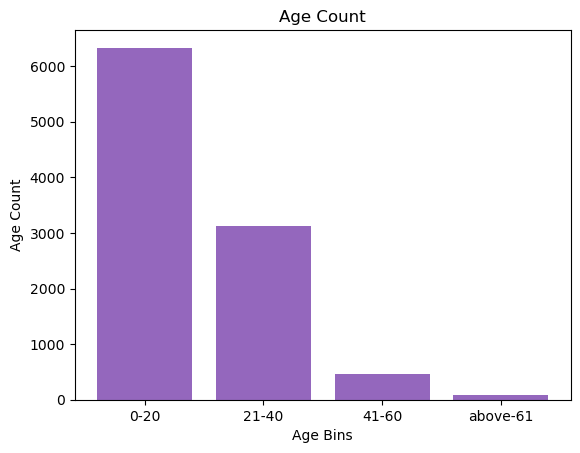

In [80]:
#making the bar charton the data 
import matplotlib.pyplot as plt
plt.bar(labels, df.Age_bins.value_counts())

#giving the title

plt.title('Age Count')

#giving x & Y labels

plt.xlabel('Age Bins')
plt.ylabel('Age Count')

#vizulllss
plt.show()

In [81]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60


In [ ]:
from sklearn import prepocessing 

In [82]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  Age_bins         10000 non-null  category
dtypes: category(1), float64(2), int64(7), object(2)
memory usage: 869.5+ KB


In [84]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Hnadling missing values

In [85]:
df.Gender.mode()

0    Male
Name: Gender, dtype: object

In [87]:
df['Gender'] = df['Gender'].fillna('Male')

In [88]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  Age_bins         10000 non-null  category
dtypes: category(1), float64(2), int64(7), object(2)
memory usage: 869.5+ KB


Label Encoding

In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender_label'] = le.fit_transform(df['Gender'])

In [94]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins,Gender_label
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-60,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-60,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-60,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,21-40,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-60,0


ONE HOT ENCODING 

In [96]:
one_hot = pd.get_dummies(df['Geography'])

In [97]:
one_hot

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [99]:
one_hot

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [102]:
df_dummies = pd.get_dummies(df).astype(int)
df_dummies.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_label,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_bins_0-20,Age_bins_21-40,Age_bins_41-60,Age_bins_above-61
0,619,42,2,0,1,1,1,101348,1,0,1,0,0,1,0,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,0,1,1,0,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,1,0,0,1,0,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,0,1,0,0,1,0,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,0,0,0,1,1,0,0,0,1,0
